<a href="https://colab.research.google.com/github/navaneethkomuravelli/2024_stml_assignments/blob/main/final_project..ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reading data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('/content/drive/MyDrive/stml-project/block_1.csv')
data.head()

,id_1,id_2,cmp_fname_c1,cmp_fname_c2,cmp_lname_c1,cmp_lname_c2,cmp_sex,cmp_bd,cmp_bm,cmp_by,cmp_plz,is_match
0,37291,53113,0.833333333333333,?,1.0,?,1,1,1,1,0,True
1,39086,47614,1,?,1.0,?,1,1,1,1,1,True
2,70031,70237,1,?,1.0,?,1,1,1,1,1,True
3,84795,97439,1,?,1.0,?,1,1,1,1,1,True
4,36950,42116,1,?,1.0,1,1,1,1,1,1,True


In [ ]:
target=data['is_match']
target.head()

,is_match
0,True
1,True
2,True
3,True
4,True


In [ ]:
x=data.drop(['is_match','id_1','id_2'],axis=1)
x.head()

,cmp_fname_c1,cmp_fname_c2,cmp_lname_c1,cmp_lname_c2,cmp_sex,cmp_bd,cmp_bm,cmp_by,cmp_plz
0,0.833333333333333,?,1.0,?,1,1,1,1,0
1,1,?,1.0,?,1,1,1,1,1
2,1,?,1.0,?,1,1,1,1,1
3,1,?,1.0,?,1,1,1,1,1
4,1,?,1.0,1,1,1,1,1,1


In [ ]:
x.isnull().sum()

,0
cmp_fname_c1,0
cmp_fname_c2,0
cmp_lname_c1,0
cmp_lname_c2,0
cmp_sex,0
cmp_bd,0
cmp_bm,0
cmp_by,0
cmp_plz,0


In [ ]:
x.replace('?',0, inplace=True)
x.isnull().sum()

,0
cmp_fname_c1,0
cmp_fname_c2,0
cmp_lname_c1,0
cmp_lname_c2,0
cmp_sex,0
cmp_bd,0
cmp_bm,0
cmp_by,0
cmp_plz,0


In [ ]:
target.replace('True',1, inplace=True)
target.replace('False',0, inplace=True)

#Before resampling data

In [ ]:
x.dtypes

,0
cmp_fname_c1,object
cmp_fname_c2,object
cmp_lname_c1,float64
cmp_lname_c2,object
cmp_sex,int64
cmp_bd,object
cmp_bm,object
cmp_by,object
cmp_plz,object


In [ ]:
print(x)

             cmp_fname_c1 cmp_fname_c2  cmp_lname_c1 cmp_lname_c2  cmp_sex  \
0       0.833333333333333            0      1.000000            0        1   
1                       1            0      1.000000            0        1   
2                       1            0      1.000000            0        1   
3                       1            0      1.000000            0        1   
4                       1            0      1.000000            1        1   
...                   ...          ...           ...          ...      ...   
574908                  1            0      0.285714            0        1   
574909                  1            0      0.125000            0        1   
574910                  1            0      0.090909            0        1   
574911                  1            0      0.111111            0        1   
574912                  1            0      0.000000            0        1   

       cmp_bd cmp_bm cmp_by cmp_plz  
0           1      1     

In [ ]:
for col in x.columns:
  if x[col].dtype == 'object':
    try:
      x[col] = x[col].astype('int64')
    except ValueError:
      x[col] = x[col].astype('float64').astype('int64')

In [ ]:
print(x)

        cmp_fname_c1  cmp_fname_c2  cmp_lname_c1  cmp_lname_c2  cmp_sex  \
0                  0             0      1.000000             0        1   
1                  1             0      1.000000             0        1   
2                  1             0      1.000000             0        1   
3                  1             0      1.000000             0        1   
4                  1             0      1.000000             1        1   
...              ...           ...           ...           ...      ...   
574908             1             0      0.285714             0        1   
574909             1             0      0.125000             0        1   
574910             1             0      0.090909             0        1   
574911             1             0      0.111111             0        1   
574912             1             0      0.000000             0        1   

        cmp_bd  cmp_bm  cmp_by  cmp_plz  
0            1       1       1        0  
1            1 

In [ ]:
x.dtypes

,0
cmp_fname_c1,int64
cmp_fname_c2,int64
cmp_lname_c1,float64
cmp_lname_c2,int64
cmp_sex,int64
cmp_bd,int64
cmp_bm,int64
cmp_by,int64
cmp_plz,int64


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574913 entries, 0 to 574912
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   cmp_fname_c1  574913 non-null  int64  
 1   cmp_fname_c2  574913 non-null  int64  
 2   cmp_lname_c1  574913 non-null  float64
 3   cmp_lname_c2  574913 non-null  int64  
 4   cmp_sex       574913 non-null  int64  
 5   cmp_bd        574913 non-null  int64  
 6   cmp_bm        574913 non-null  int64  
 7   cmp_by        574913 non-null  int64  
 8   cmp_plz       574913 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 39.5 MB


In [ ]:
x.describe()

,cmp_fname_c1,cmp_fname_c2,cmp_lname_c1,cmp_lname_c2,cmp_sex,cmp_bd,cmp_bm,cmp_by,cmp_plz
count,574913.000000,574913.000000,574913.000000,574913.000000,574913.000000,574913.000000,574913.000000,574913.000000,574913.000000
mean,0.610351,0.015623,0.315572,0.000089,0.955092,0.224731,0.488583,0.222642,0.005483
std,0.487671,0.124013,0.334249,0.009418,0.207102,0.417406,0.499870,0.416020,0.073841
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.100000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.181818,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.428571,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
for clo in x.columns:
  print(x[clo].describe())
  print()
  print()
  print()

count    574913.000000
mean          0.610351
std           0.487671
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: cmp_fname_c1, dtype: float64



count    574913.000000
mean          0.015623
std           0.124013
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: cmp_fname_c2, dtype: float64



count    574913.000000
mean          0.315572
std           0.334249
min           0.000000
25%           0.100000
50%           0.181818
75%           0.428571
max           1.000000
Name: cmp_lname_c1, dtype: float64



count    574913.000000
mean          0.000089
std           0.009418
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: cmp_lname_c2, dtype: float64



count    574913.000000
mean          0.955092
std           0.207102
min           0.000000
25%           1.0000

In [ ]:
for clo in x.columns:
  print(x[clo].info())
  print()
  print()
  print()

<class 'pandas.core.series.Series'>
RangeIndex: 574913 entries, 0 to 574912
Series name: cmp_fname_c1
Non-Null Count   Dtype
--------------   -----
574913 non-null  int64
dtypes: int64(1)
memory usage: 4.4 MB
None



<class 'pandas.core.series.Series'>
RangeIndex: 574913 entries, 0 to 574912
Series name: cmp_fname_c2
Non-Null Count   Dtype
--------------   -----
574913 non-null  int64
dtypes: int64(1)
memory usage: 4.4 MB
None



<class 'pandas.core.series.Series'>
RangeIndex: 574913 entries, 0 to 574912
Series name: cmp_lname_c1
Non-Null Count   Dtype  
--------------   -----  
574913 non-null  float64
dtypes: float64(1)
memory usage: 4.4 MB
None



<class 'pandas.core.series.Series'>
RangeIndex: 574913 entries, 0 to 574912
Series name: cmp_lname_c2
Non-Null Count   Dtype
--------------   -----
574913 non-null  int64
dtypes: int64(1)
memory usage: 4.4 MB
None



<class 'pandas.core.series.Series'>
RangeIndex: 574913 entries, 0 to 574912
Series name: cmp_sex
Non-Null Count   Dtype
----

In [ ]:
for clo in x.columns:
  print(x[clo].value_counts())
  print()
  print()
  print()

cmp_fname_c1
1    350899
0    224014
Name: count, dtype: int64



cmp_fname_c2
0    565931
1      8982
Name: count, dtype: int64



cmp_lname_c1
0.000000    120134
1.000000     73136
0.125000     38464
0.142857     37906
0.111111     29772
             ...  
0.263158         1
0.238095         1
0.190476         1
0.533333         1
0.315789         1
Name: count, Length: 89, dtype: int64



cmp_lname_c2
0    574862
1        51
Name: count, dtype: int64



cmp_sex
1    549095
0     25818
Name: count, dtype: int64



cmp_bd
0    445712
1    129201
Name: count, dtype: int64



cmp_bm
0    294020
1    280893
Name: count, dtype: int64



cmp_by
0    446913
1    128000
Name: count, dtype: int64



cmp_plz
0    571761
1      3152
Name: count, dtype: int64





In [ ]:
for clo in x.columns:
  print(x[clo].unique())
  print()
  print()
  print()

[0 1]



[0 1]



[1.         0.25       0.9        0.92307692 0.875      0.88888889
 0.75       0.83333333 0.85714286 0.90909091 0.         0.16666667
 0.14285714 0.2        0.5        0.33333333 0.11111111 0.22222222
 0.77777778 0.125      0.28571429 0.09090909 0.375      0.6
 0.1        0.71428571 0.3        0.07692308 0.27272727 0.66666667
 0.44444444 0.45454545 0.18181818 0.42857143 0.8        0.625
 0.4        0.08333333 0.26666667 0.21428571 0.57142857 0.36363636
 0.15384615 0.23076923 0.07142857 0.30769231 0.46153846 0.38461538
 0.55555556 0.41666667 0.7        0.13333333 0.23529412 0.1875
 0.0625     0.46666667 0.53846154 0.54545455 0.0952381  0.06666667
 0.35714286 0.69230769 0.91666667 0.23809524 0.63636364 0.05882353
 0.72727273 0.81818182 0.17647059 0.58333333 0.10526316 0.11764706
 0.3125     0.61538462 0.35294118 0.05       0.15       0.15789474
 0.45       0.4375     0.92857143 0.26315789 0.21052632 0.29411765
 0.19047619 0.53333333 0.05555556 0.05263158 0.31578947]





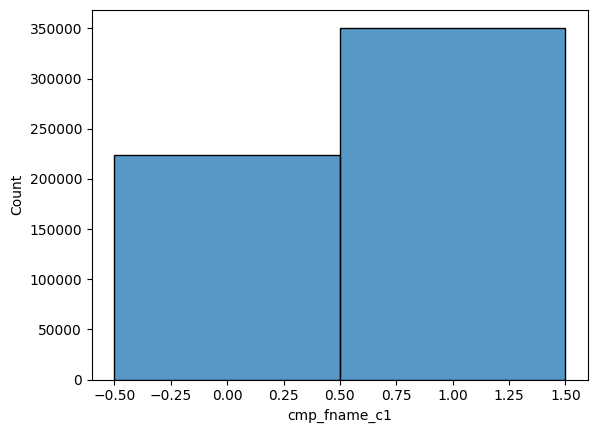

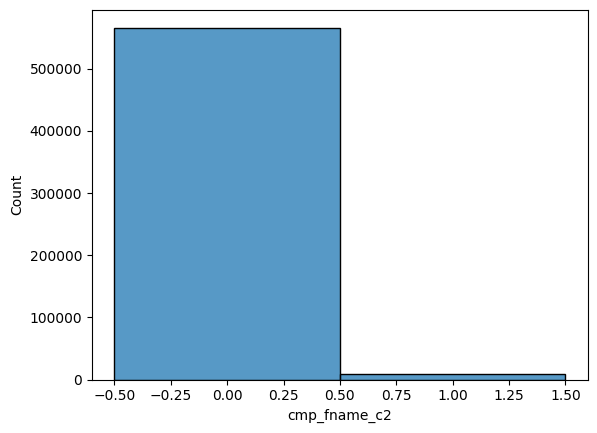

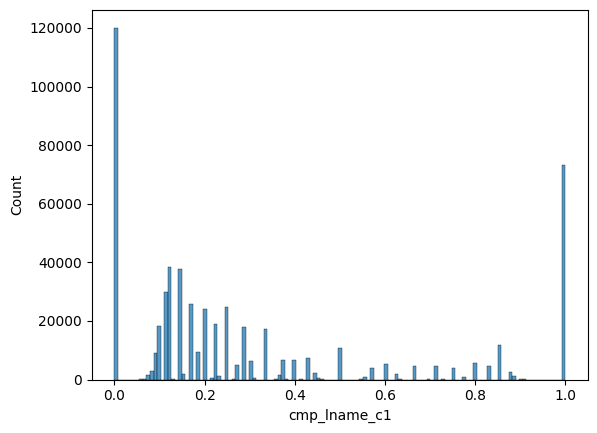

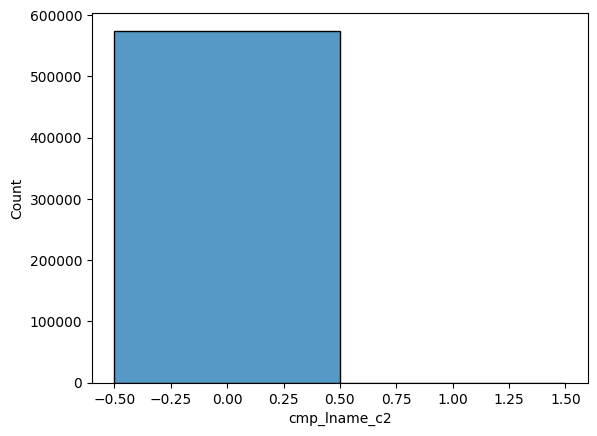

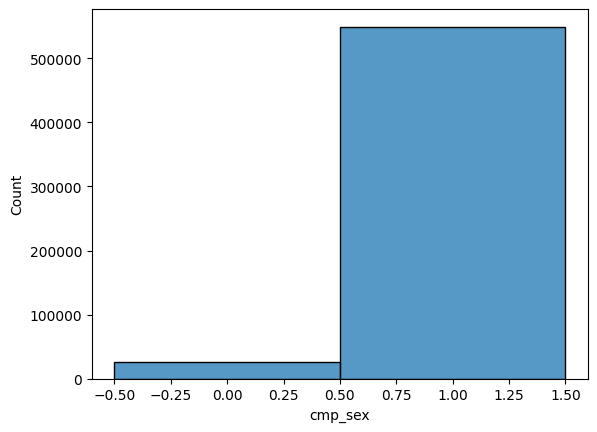

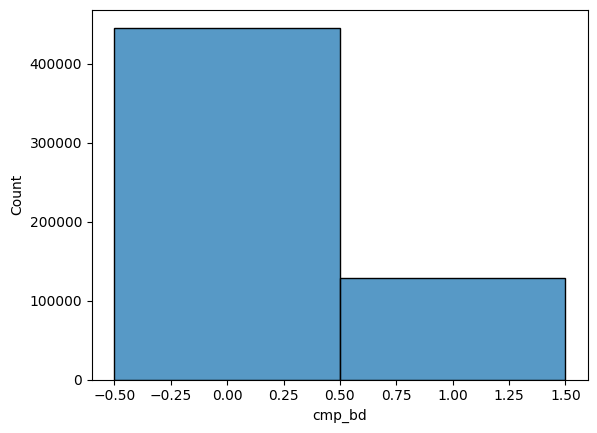

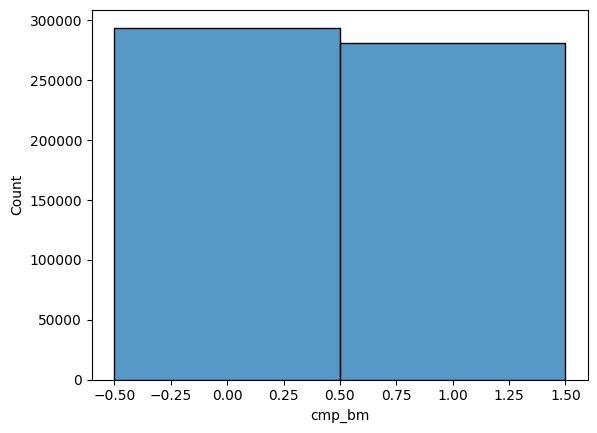

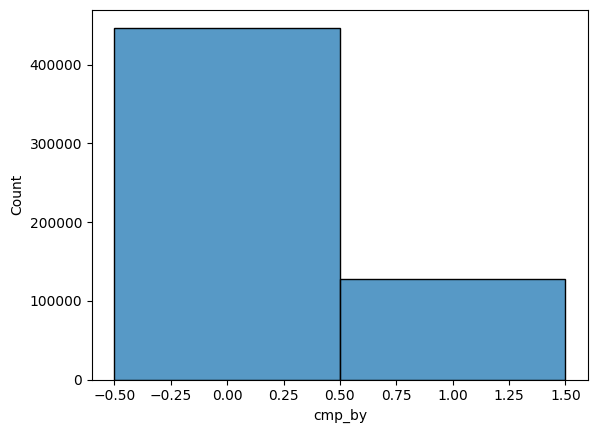

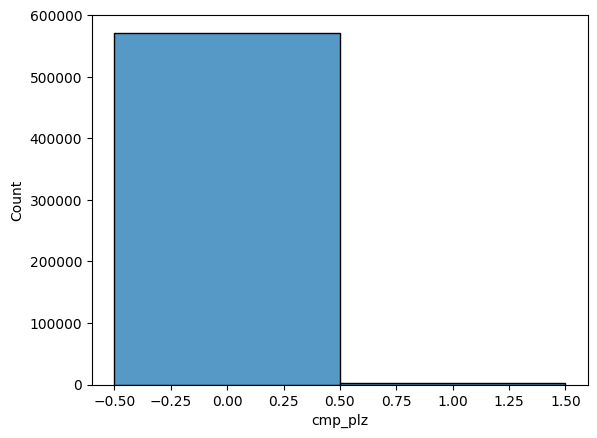

In [ ]:
for clo in x.columns:
  if x[clo].dtype == 'int64':
    sns.histplot(x[clo], discrete=True)
  elif x[clo].dtype == 'float64':
    sns.histplot(x[clo])

  plt.show()

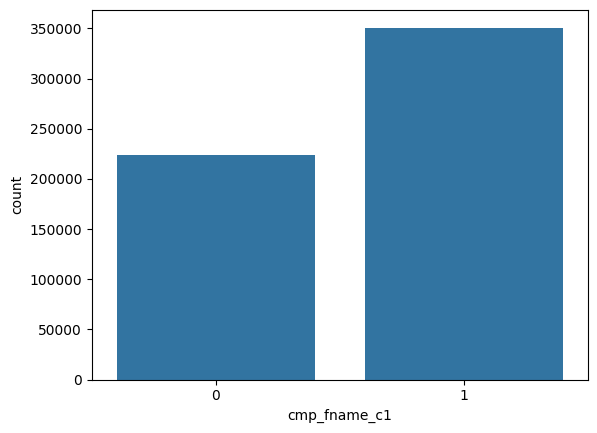

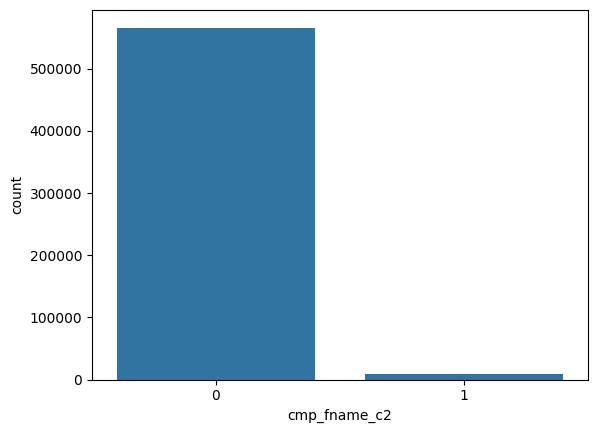

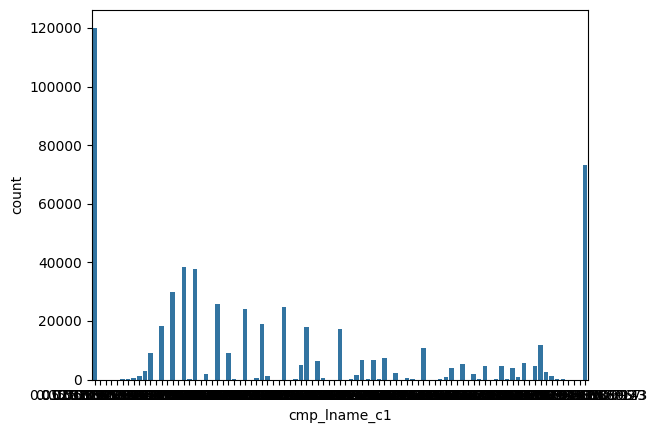

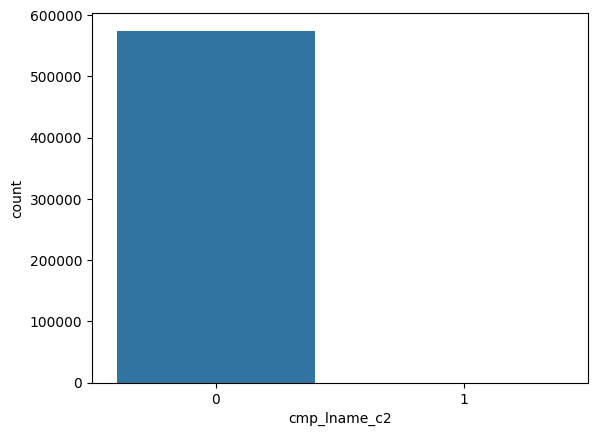

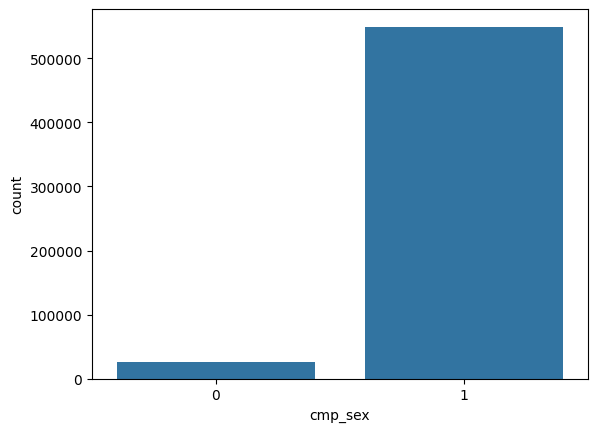

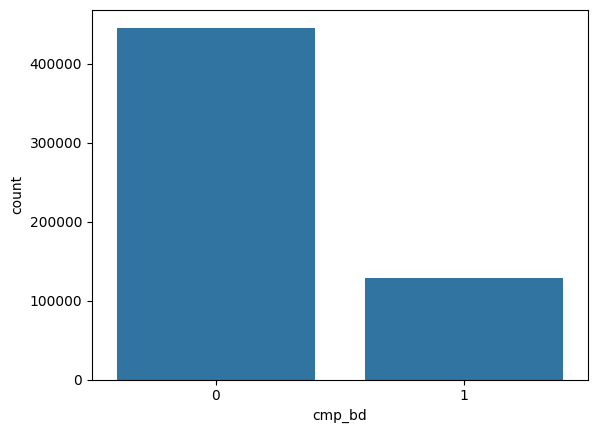

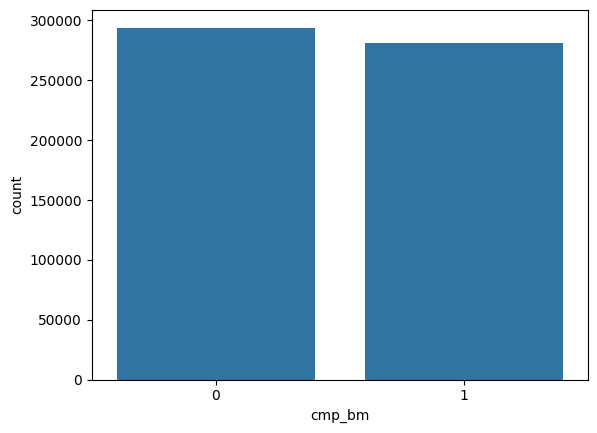

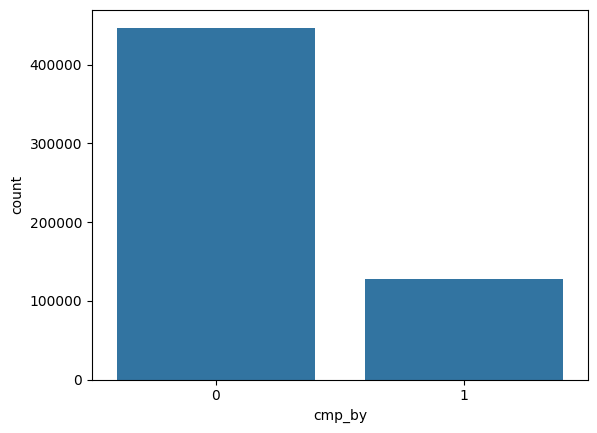

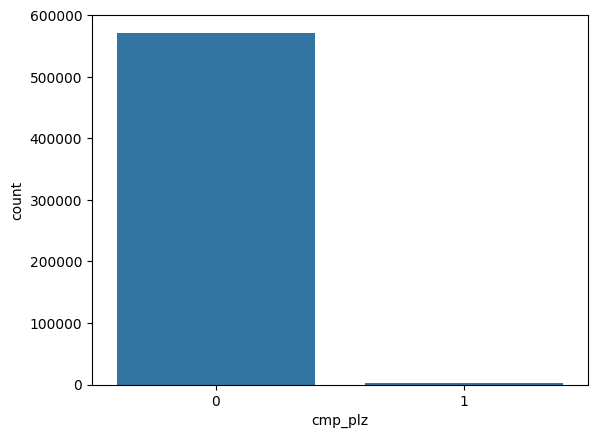

In [ ]:
for col in x.columns:
    sns.countplot(x=col, data=x)
    plt.show()

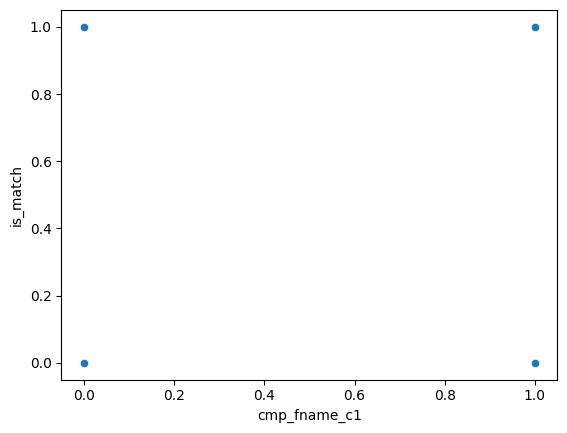

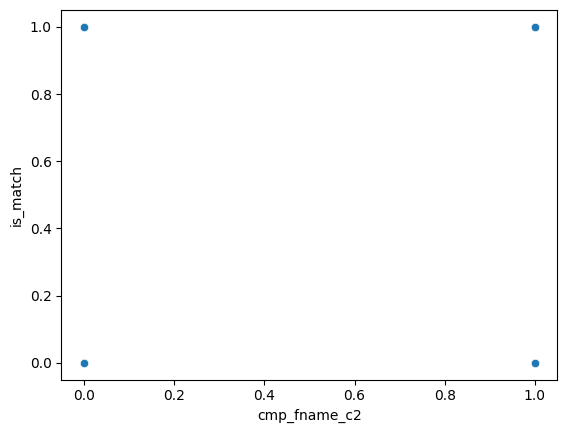

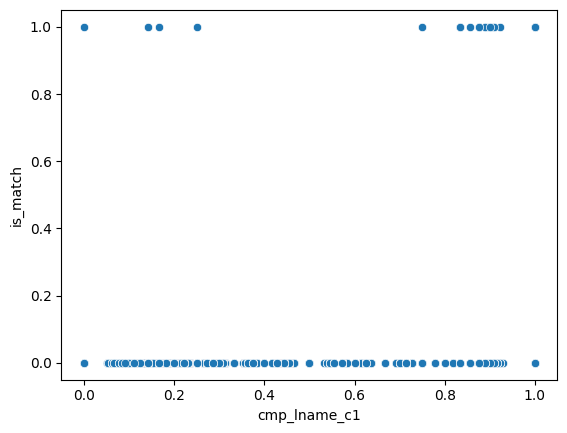

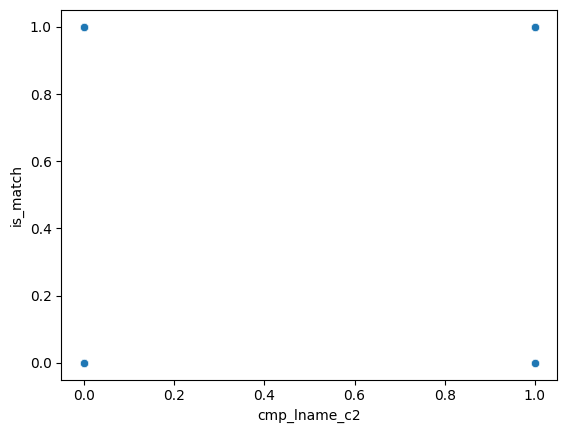

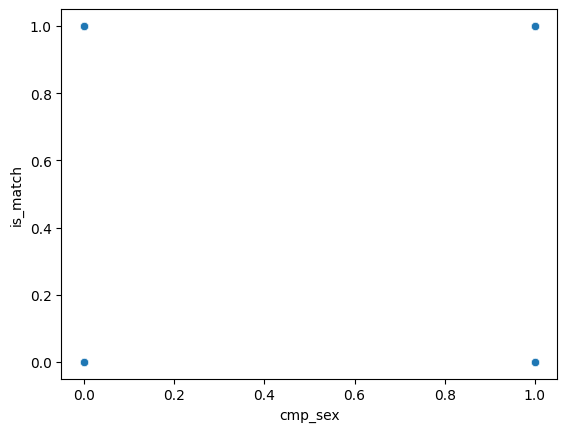

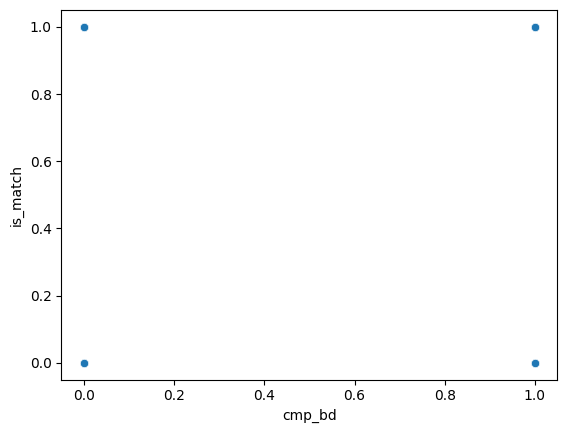

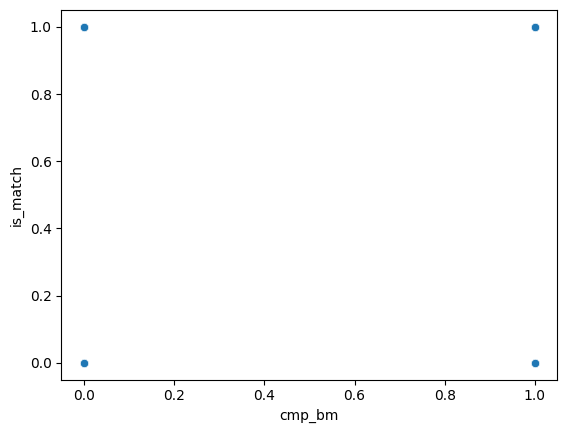

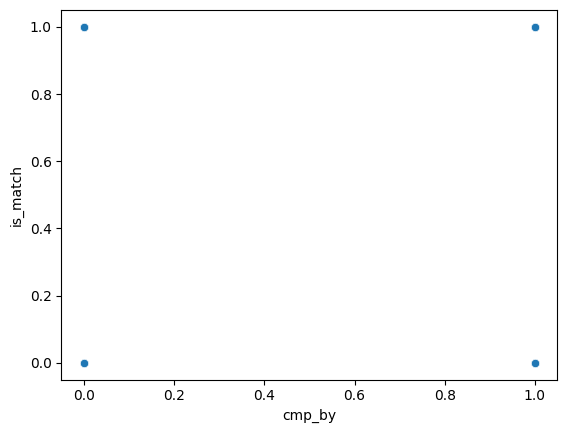

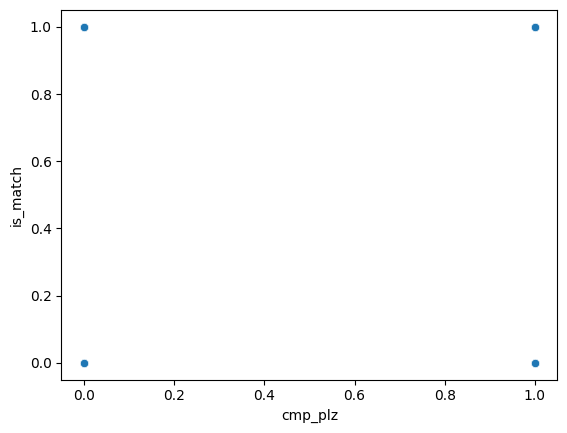

In [ ]:
for col in x.columns:
    sns.scatterplot(x=x[col],y=target)
    plt.show()

In [ ]:
x.corr()

,cmp_fname_c1,cmp_fname_c2,cmp_lname_c1,cmp_lname_c2,cmp_sex,cmp_bd,cmp_bm,cmp_by,cmp_plz
cmp_fname_c1,1.000000,0.083086,-0.596283,0.006768,0.140190,0.019756,0.243133,0.039790,0.035318
cmp_fname_c2,0.083086,1.000000,-0.056377,0.001792,0.018649,0.003241,0.025465,0.007256,0.016859
cmp_lname_c1,-0.596283,-0.056377,1.000000,0.019287,0.109717,-0.211217,-0.391373,-0.219276,0.100472
cmp_lname_c2,0.006768,0.001792,0.019287,1.000000,0.002042,0.016609,0.008898,0.016712,0.121856
cmp_sex,0.140190,0.018649,0.109717,0.002042,1.000000,-0.243647,-0.151330,-0.240803,0.009389
cmp_bd,0.019756,0.003241,-0.211217,0.016609,-0.243647,1.000000,-0.182806,0.071814,0.084236
cmp_bm,0.243133,0.025465,-0.391373,0.008898,-0.151330,-0.182806,1.000000,-0.181351,0.046228
cmp_by,0.039790,0.007256,-0.219276,0.016712,-0.240803,0.071814,-0.181351,1.000000,0.086588
cmp_plz,0.035318,0.016859,0.100472,0.121856,0.009389,0.084236,0.046228,0.086588,1.000000


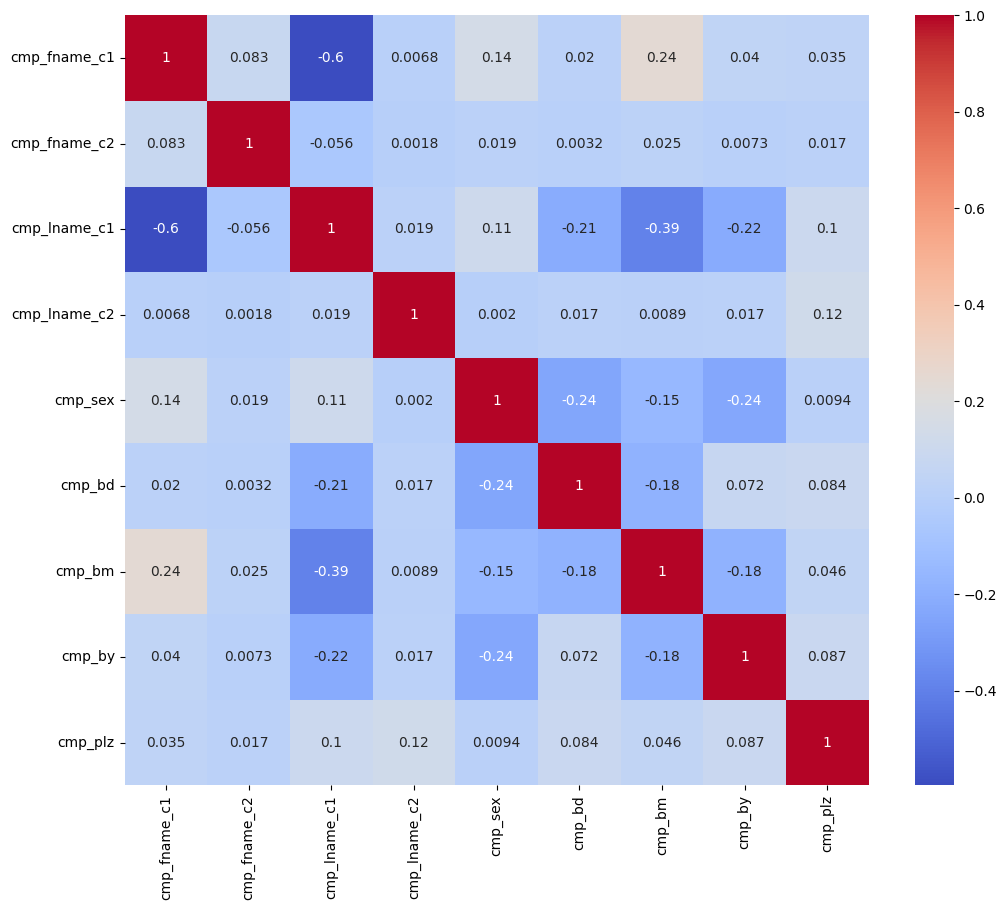

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(x.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
target.value_counts()

,count
is_match,
False,572820
True,2093


In [ ]:
target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 574913 entries, 0 to 574912
Series name: is_match
Non-Null Count   Dtype
--------------   -----
574913 non-null  bool 
dtypes: bool(1)
memory usage: 561.6 KB


In [ ]:
target.describe()

,is_match
count,574913
unique,2
top,False
freq,572820


#After resampling the data

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X,Y= smote.fit_resample(x,target)


In [ ]:
for clo in X.columns:
  print(X[clo].describe())
  print()
  print()
  print()

count    1.145640e+06
mean     7.985519e-01
std      4.010822e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: cmp_fname_c1, dtype: float64



count    1.145640e+06
mean     3.784435e-02
std      1.908198e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: cmp_fname_c2, dtype: float64



count    1.145640e+06
mean     6.556153e-01
std      4.159434e-01
min      0.000000e+00
25%      1.666667e-01
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: cmp_lname_c1, dtype: float64



count    1.145640e+06
mean     1.134300e-02
std      1.058978e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: cmp_lname_c2, dtype: float64



count    1.145640e+06
mean     9.722740e-01
std      1.641867e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.0

In [ ]:
for clo in X.columns:
  print(X[clo].info())
  print()
  print()
  print()

<class 'pandas.core.series.Series'>
RangeIndex: 1145640 entries, 0 to 1145639
Series name: cmp_fname_c1
Non-Null Count    Dtype
--------------    -----
1145640 non-null  int64
dtypes: int64(1)
memory usage: 8.7 MB
None



<class 'pandas.core.series.Series'>
RangeIndex: 1145640 entries, 0 to 1145639
Series name: cmp_fname_c2
Non-Null Count    Dtype
--------------    -----
1145640 non-null  int64
dtypes: int64(1)
memory usage: 8.7 MB
None



<class 'pandas.core.series.Series'>
RangeIndex: 1145640 entries, 0 to 1145639
Series name: cmp_lname_c1
Non-Null Count    Dtype  
--------------    -----  
1145640 non-null  float64
dtypes: float64(1)
memory usage: 8.7 MB
None



<class 'pandas.core.series.Series'>
RangeIndex: 1145640 entries, 0 to 1145639
Series name: cmp_lname_c2
Non-Null Count    Dtype
--------------    -----
1145640 non-null  int64
dtypes: int64(1)
memory usage: 8.7 MB
None



<class 'pandas.core.series.Series'>
RangeIndex: 1145640 entries, 0 to 1145639
Series name: cmp_sex
Non-N

In [ ]:
for clo in X.columns:
  print(X[clo].value_counts())
  print()
  print()
  print()

cmp_fname_c1
1    914853
0    230787
Name: count, dtype: int64



cmp_fname_c2
0    1102284
1      43356
Name: count, dtype: int64



cmp_lname_c1
1.000000    639212
0.000000    120134
0.125000     38464
0.142857     37906
0.111111     29772
             ...  
0.917582         1
0.895125         1
0.905281         1
0.844134         1
0.851227         1
Name: count, Length: 4311, dtype: int64



cmp_lname_c2
0    1132645
1      12995
Name: count, dtype: int64



cmp_sex
1    1113876
0      31764
Name: count, dtype: int64



cmp_bd
1    697088
0    448552
Name: count, dtype: int64



cmp_bm
1    850210
0    295430
Name: count, dtype: int64



cmp_by
1    696348
0    449292
Name: count, dtype: int64



cmp_plz
0    598711
1    546929
Name: count, dtype: int64





In [ ]:
for clo in X.columns:
  print(X[clo].unique())
  print()
  print()
  print()

[0 1]



[0 1]



[1.         0.25       0.9        ... 0.85545492 0.88857919 0.85122657]



[0 1]



[1 0]



[1 0]



[1 0]



[1 0]



[0 1]





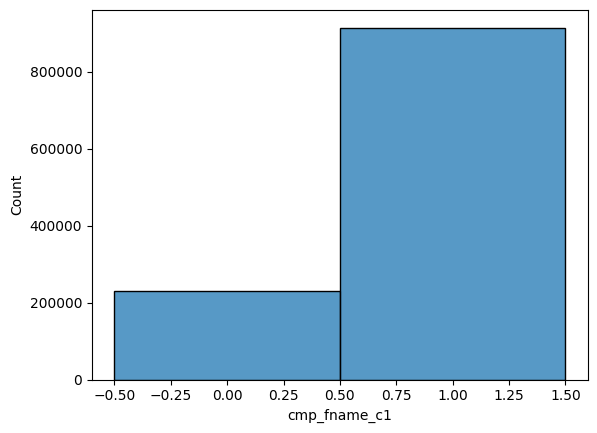

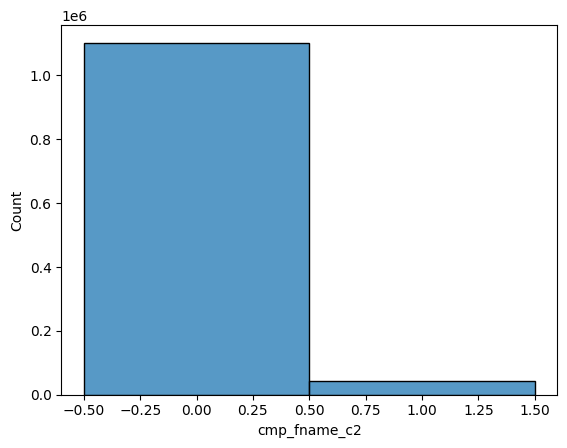

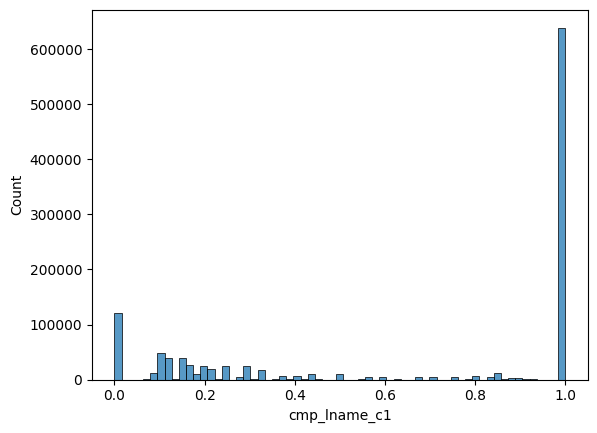

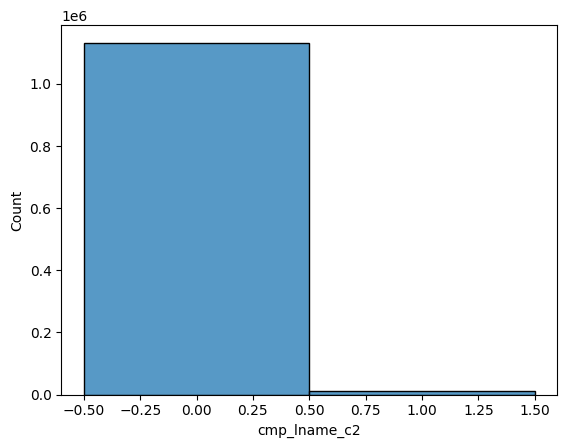

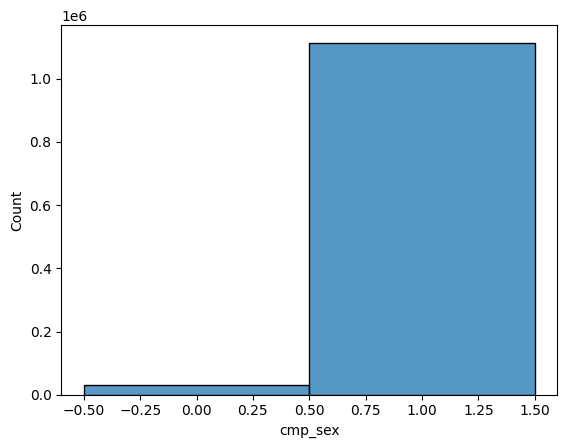

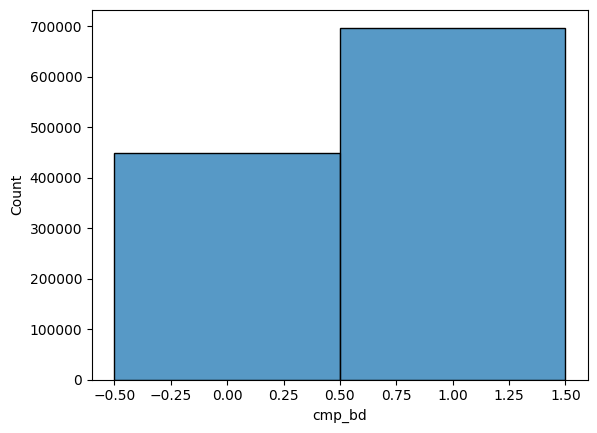

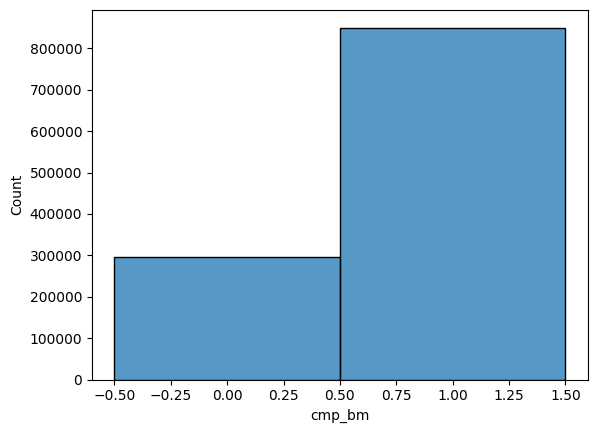

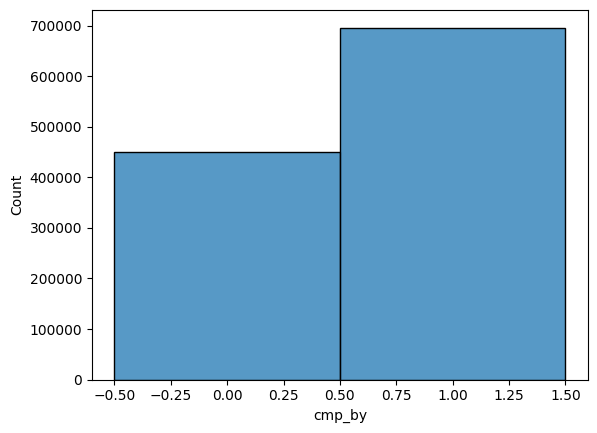

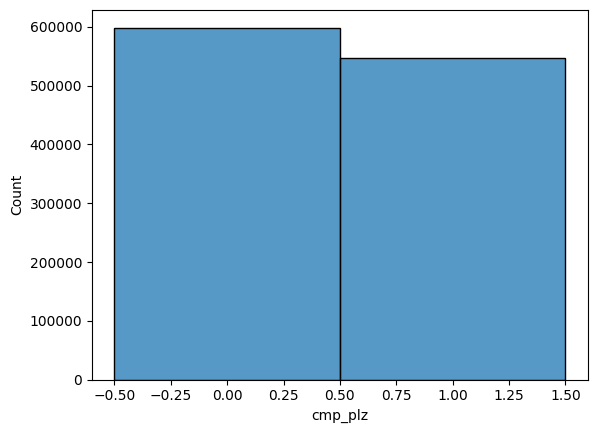

In [ ]:
for clo in X.columns:
  if X[clo].dtype == 'int64':
    sns.histplot(X[clo], discrete=True)
  elif X[clo].dtype == 'float64':
    sns.histplot(X[clo])

  plt.show()

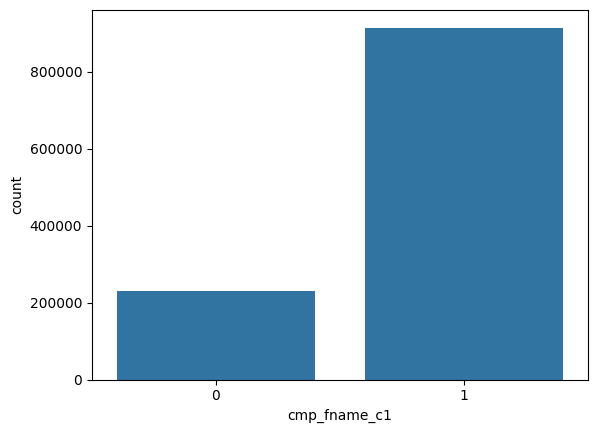

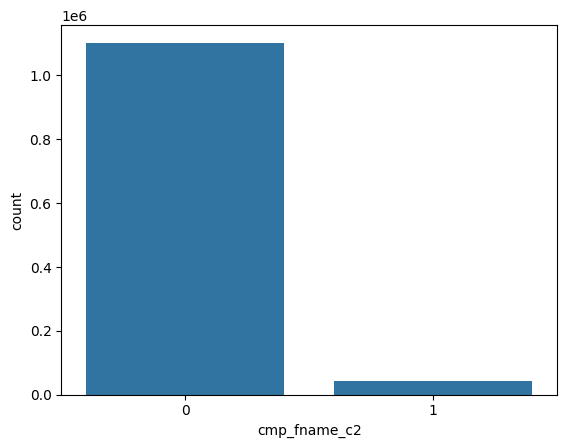

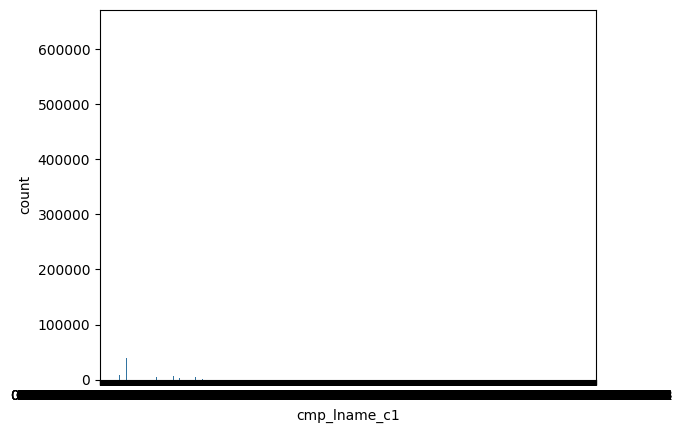

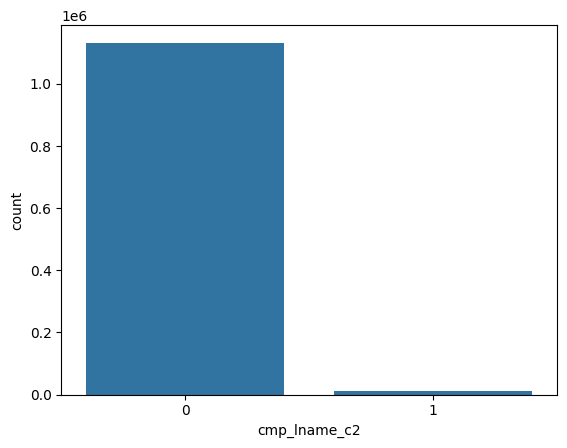

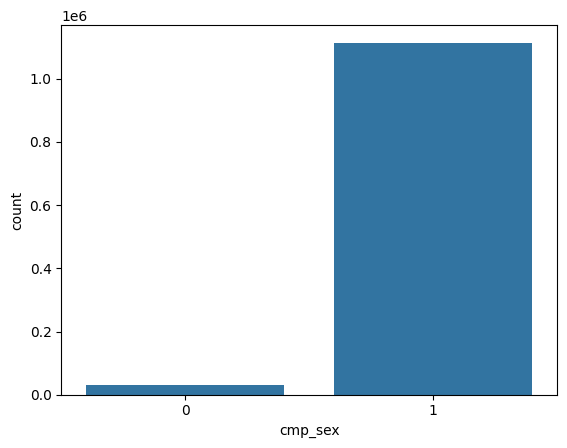

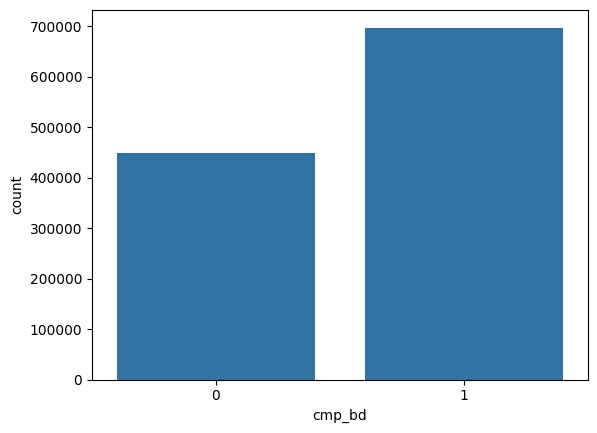

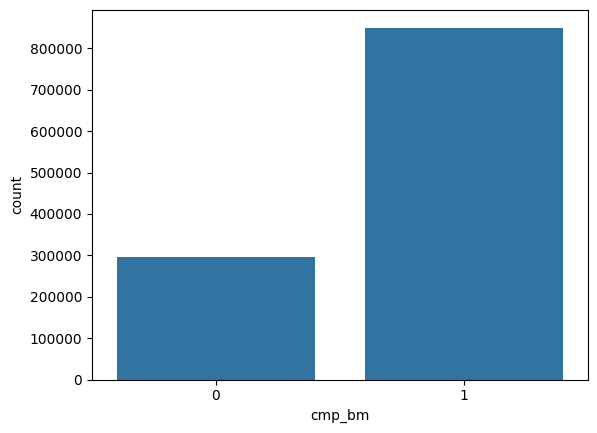

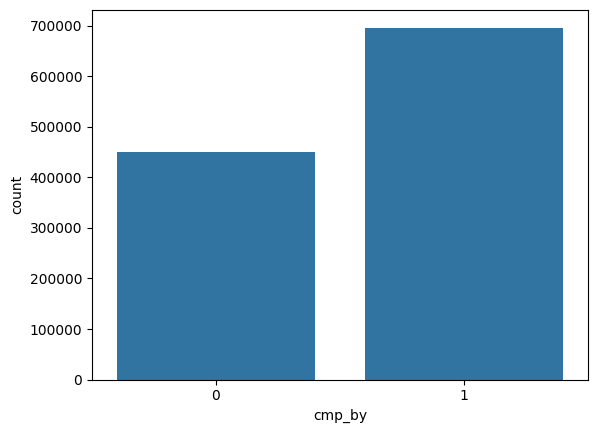

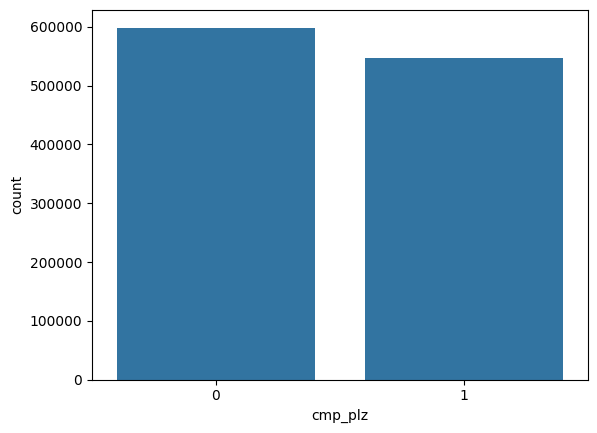

In [ ]:
for col in X.columns:
    sns.countplot(x=col, data=X)
    plt.show()

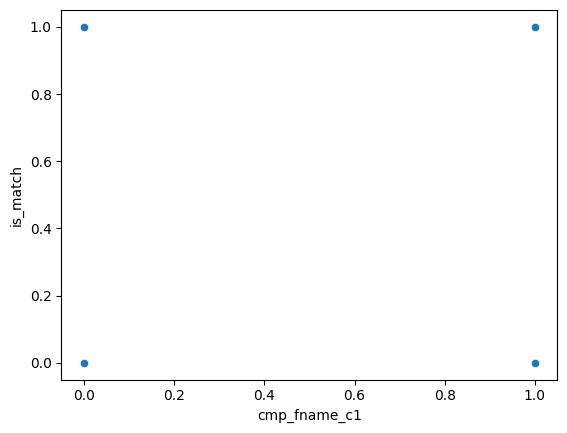

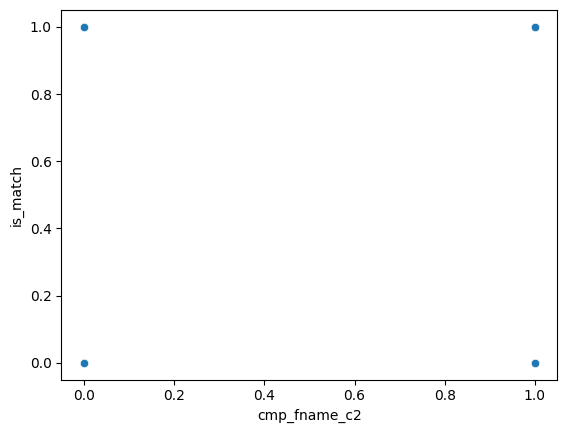

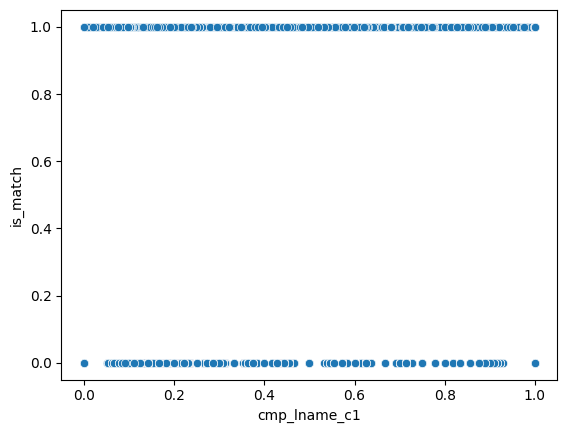

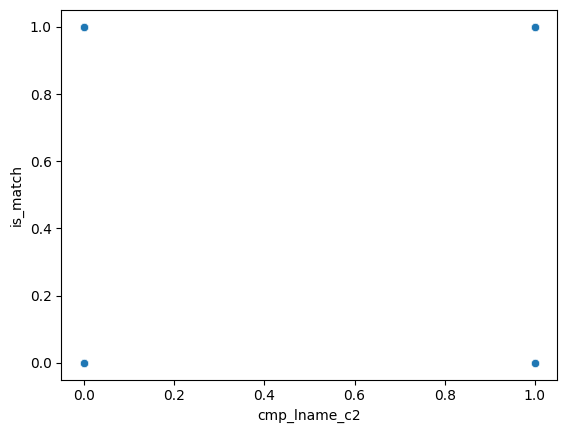

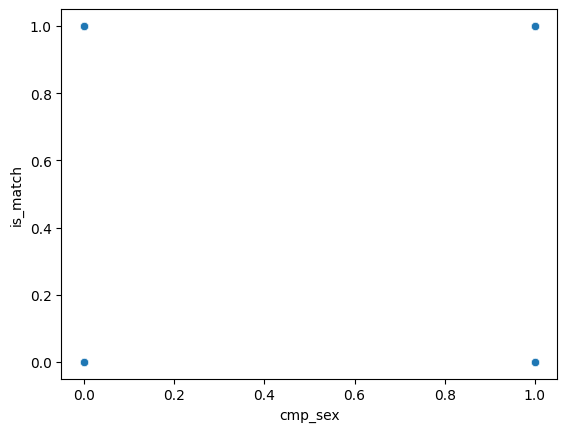

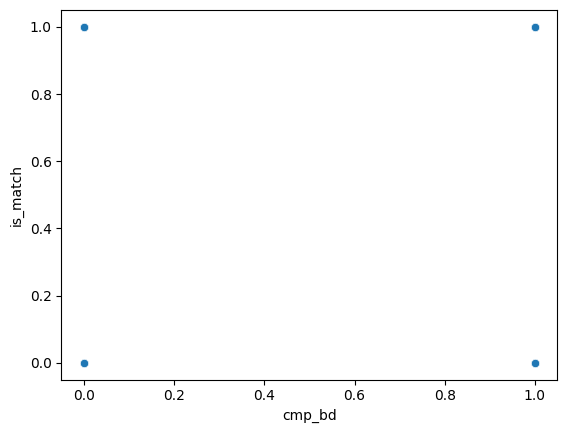

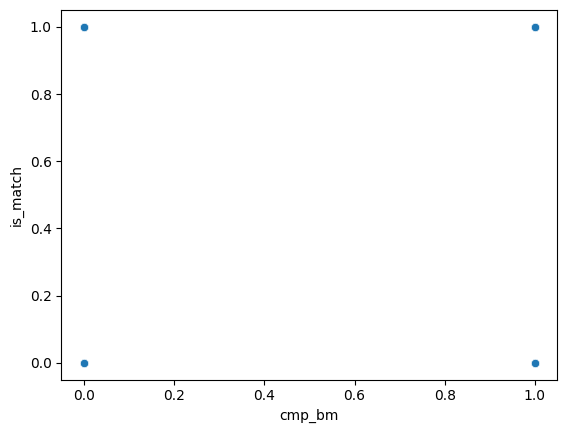

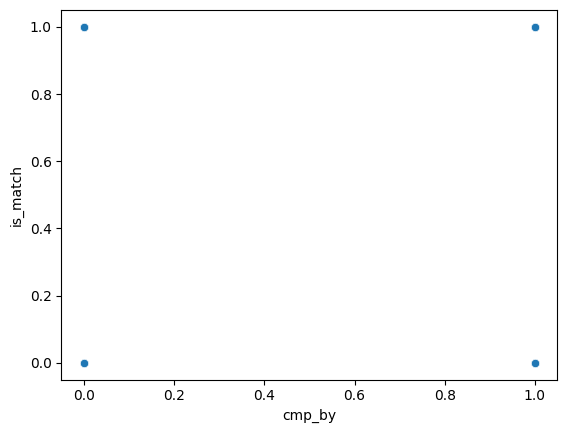

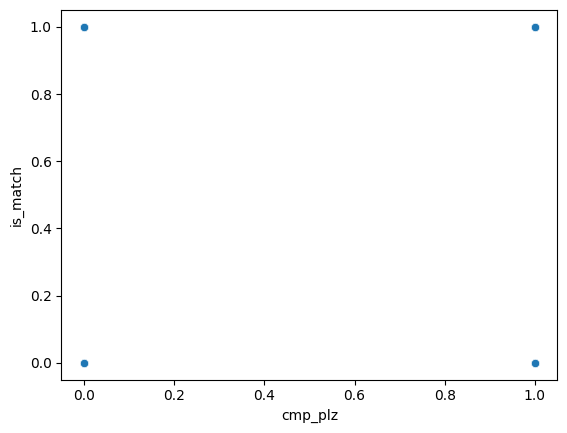

In [ ]:
for col in X.columns:
    sns.scatterplot(x=X[col],y=Y)
    plt.show()

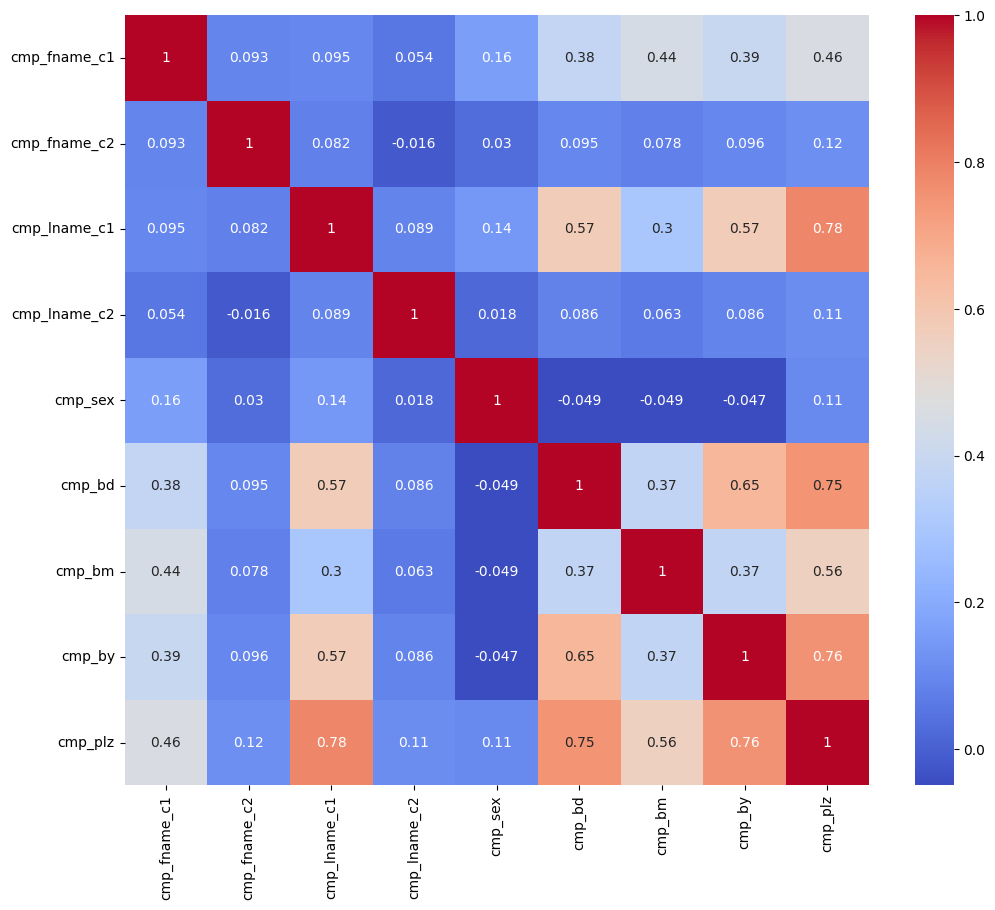

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
Y.value_counts()

,count
is_match,
True,572820
False,572820


In [ ]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1145640 entries, 0 to 1145639
Series name: is_match
Non-Null Count    Dtype
--------------    -----
1145640 non-null  bool 
dtypes: bool(1)
memory usage: 1.1 MB


In [ ]:
Y.describe()

,is_match
count,1145640
unique,2
top,True
freq,572820


#Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
x_train

,cmp_fname_c1,cmp_fname_c2,cmp_lname_c1,cmp_lname_c2,cmp_sex,cmp_bd,cmp_bm,cmp_by,cmp_plz
206374,0,0,0.166667,0,1,1,1,1,0
308058,1,0,0.200000,0,1,1,0,0,0
588420,1,0,1.000000,0,1,1,1,1,1
413351,0,0,1.000000,0,1,0,0,0,0
606894,1,0,1.000000,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
110268,1,0,0.142857,0,1,1,0,0,0
259178,1,0,0.200000,0,1,0,0,1,0
131932,0,0,0.555556,0,1,0,1,0,0
671155,1,1,1.000000,0,1,1,1,1,1


#Perceptron

In [ ]:
from sklearn.linear_model import Perceptron
pm=Perceptron()
pm.fit(x_train,y_train)

Perceptron()

In [ ]:
yp=pm.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,yp))


[[114612     78]
 [     0 114438]]


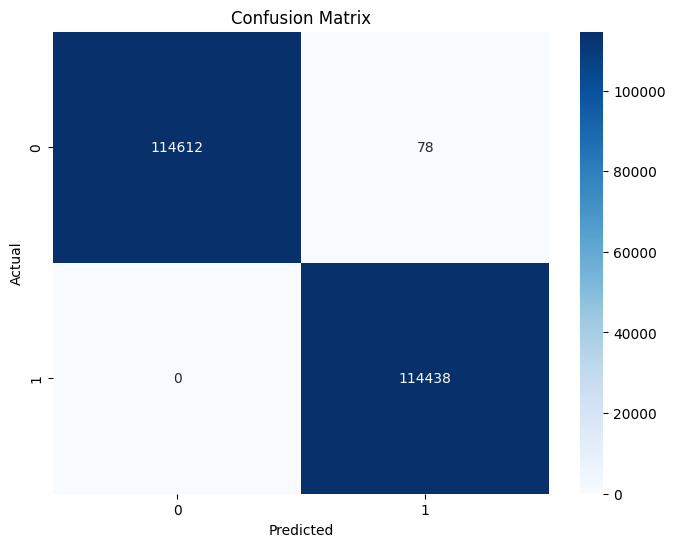

In [ ]:
cm = confusion_matrix(y_test, yp)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00    114690
        True       1.00      1.00      1.00    114438

    accuracy                           1.00    229128
   macro avg       1.00      1.00      1.00    229128
weighted avg       1.00      1.00      1.00    229128



In [ ]:
print(accuracy_score(y_test,yp))

0.9996595789253169



#LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
yp = lr.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,yp))

[[114663     27]
 [    52 114386]]


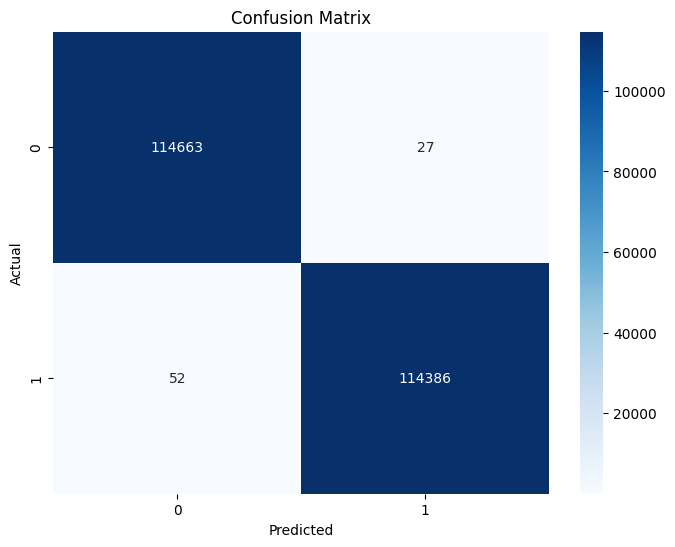

In [ ]:
cm = confusion_matrix(y_test, yp)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00    114690
        True       1.00      1.00      1.00    114438

    accuracy                           1.00    229128
   macro avg       1.00      1.00      1.00    229128
weighted avg       1.00      1.00      1.00    229128



In [ ]:
print(accuracy_score(y_test,yp))

0.9996552145525645


#Support Vector Mechine

In [ ]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)

SVC()

In [ ]:
yp=sv.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,yp))

[[114647     43]
 [     0 114438]]


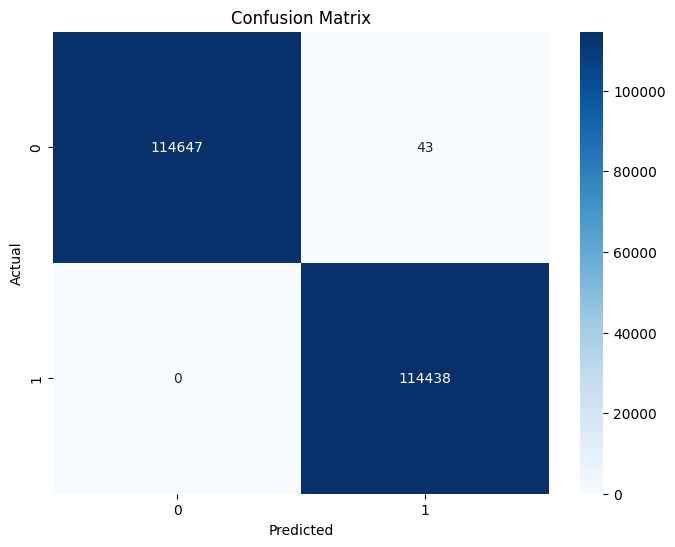

In [ ]:
cm = confusion_matrix(y_test, yp)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00    114690
        True       1.00      1.00      1.00    114438

    accuracy                           1.00    229128
   macro avg       1.00      1.00      1.00    229128
weighted avg       1.00      1.00      1.00    229128



In [ ]:
print(accuracy_score(y_test,yp))

0.999812331971649


KNN MODEL

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
28641/28641 ━━━━━━━━━━━━━━━━━━━━ 51s 2ms/step - accuracy: 0.9985 - loss: 0.0068
Epoch 2/10
28641/28641 ━━━━━━━━━━━━━━━━━━━━ 50s 2ms/step - accuracy: 0.9997 - loss: 6.5986e-04
Epoch 3/10
28641/28641 ━━━━━━━━━━━━━━━━━━━━ 54s 2ms/step - accuracy: 0.9997 - loss: 6.3054e-04
Epoch 4/10
28641/28641 ━━━━━━━━━━━━━━━━━━━━ 51s 2ms/step - accuracy: 0.9997 - loss: 6.5145e-04
Epoch 5/10
28641/28641 ━━━━━━━━━━━━━━━━━━━━ 84s 2ms/step - accuracy: 0.9998 - loss: 5.7764e-04
Epoch 6/10
28641/28641 ━━━━━━━━━━━━━━━━━━━━ 87s 2ms/step - accuracy: 0.9998 - loss: 5.8150e-04
Epoch 7/10
28641/28641 ━━━━━━━━━━━━━━━━━━━━ 50s 2ms/step - accuracy: 0.9998 - loss: 5.7949e-04
Epoch 8/10
28641/28641 ━━━━━━━━━━━━━━━━━━━━ 84s 2ms/step - accuracy: 0.9997 - loss: 5.5210e-04
Epoch 9/10
28641/28641 ━━━━━━━━━━━━━━━━━━━━ 80s 2ms/step - accuracy: 0.9998 - loss: 6.0177e-04
Epoch 10/10
28641/28641 ━━━━━━━━━━━━━━━━━━━━ 52s 2ms/step - accuracy: 0.9998 - loss: 5.5924e-04


In [ ]:
_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

7161/7161 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.9998 - loss: 4.3044e-04
Accuracy: 99.98


In [ ]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

7161/7161 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[114647     43]
 [     2 114436]]


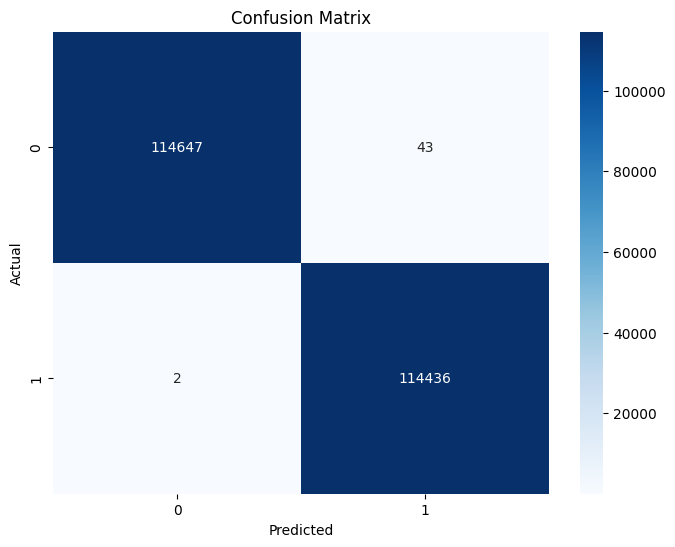

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00    114690
        True       1.00      1.00      1.00    114438

    accuracy                           1.00    229128
   macro avg       1.00      1.00      1.00    229128
weighted avg       1.00      1.00      1.00    229128



In [ ]:
print(accuracy_score(y_test,y_pred))

0.9998036032261444


In [ ]:
value_counts = Y.value_counts()
print(value_counts)

is_match
True     572820
False    572820
Name: count, dtype: int64
